<a href="https://colab.research.google.com/github/ShubhamSBhat/Bengaluru-Restaurants-Analysis/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import operator

%matplotlib inline

import os

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/zomato.csv')

In [7]:
print('Data has {} columns and {} rows'.format(df.shape[0],df.shape[1]))

Data has 51717 columns and 17 rows


In [8]:
# Basic information regarding dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [9]:
# Dropping columns 'url', 'address' and 'phone'  as they are not much relevant for analysis.

df.drop(['url', 'address', 'phone',], axis=1, inplace=True)

In [10]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [13]:
def plot_location_graph(data, title):
    '''
    Function to plot barplot between locations and restaurants
    based on provided filtered data
    
    Input : 
     - data : frequency data for locations
     - title : Title for plot 
    
    '''

    loc_count = data
    plt.figure(figsize=(20,10))
    sns.barplot(loc_count.index, loc_count.values, alpha=0.8, color = 'skyblue')
    plt.title(title, fontsize=25)
    plt.ylabel('Number of Restaurants', fontsize=20)
    plt.xlabel('Locations', fontsize=20)
    plt.xticks(
        rotation=45, 
        horizontalalignment='right',
        fontweight='light',
        fontsize='x-large'  
    )
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


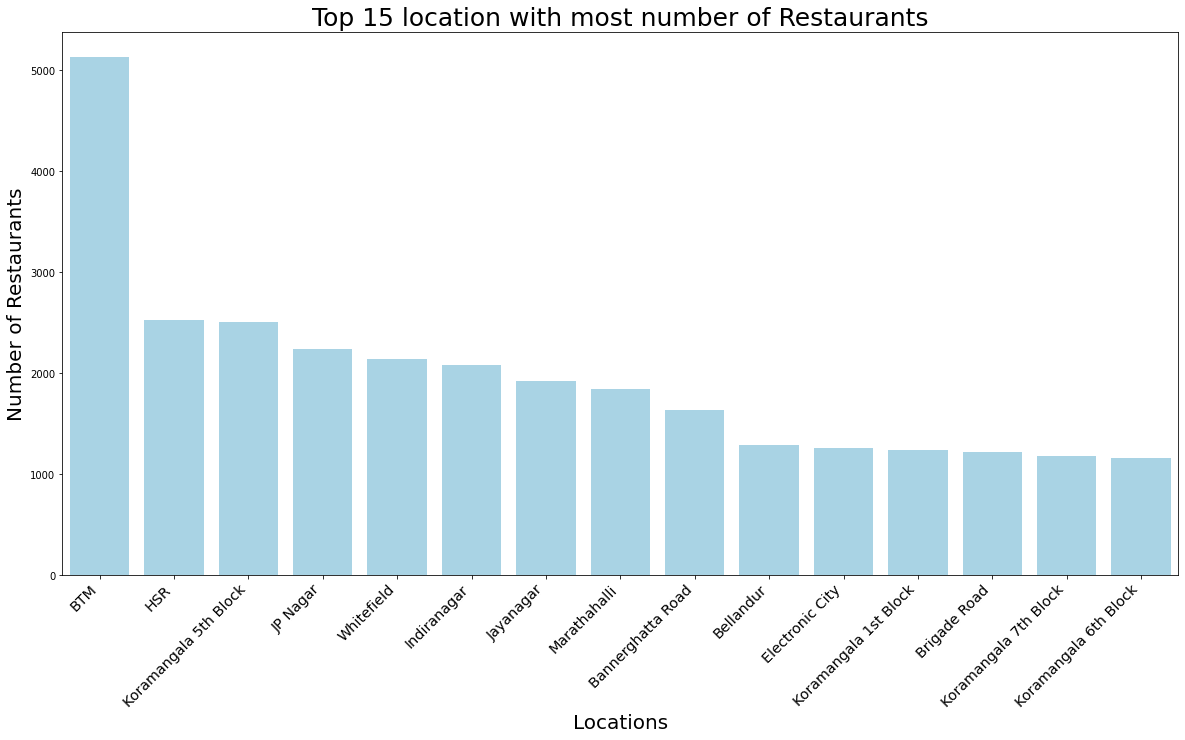

In [14]:
# Filtering top 15 locations with maximum number of restaurants in it

plot_location_graph(df['location'].value_counts()[:15,], 'Top 15 location with most number of Restaurants')

In [15]:
print('There are total {} unique Restaurants in Bangalore'.format(len(df['name'].unique())))

There are total 8792 unique Restaurants in Bangalore


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


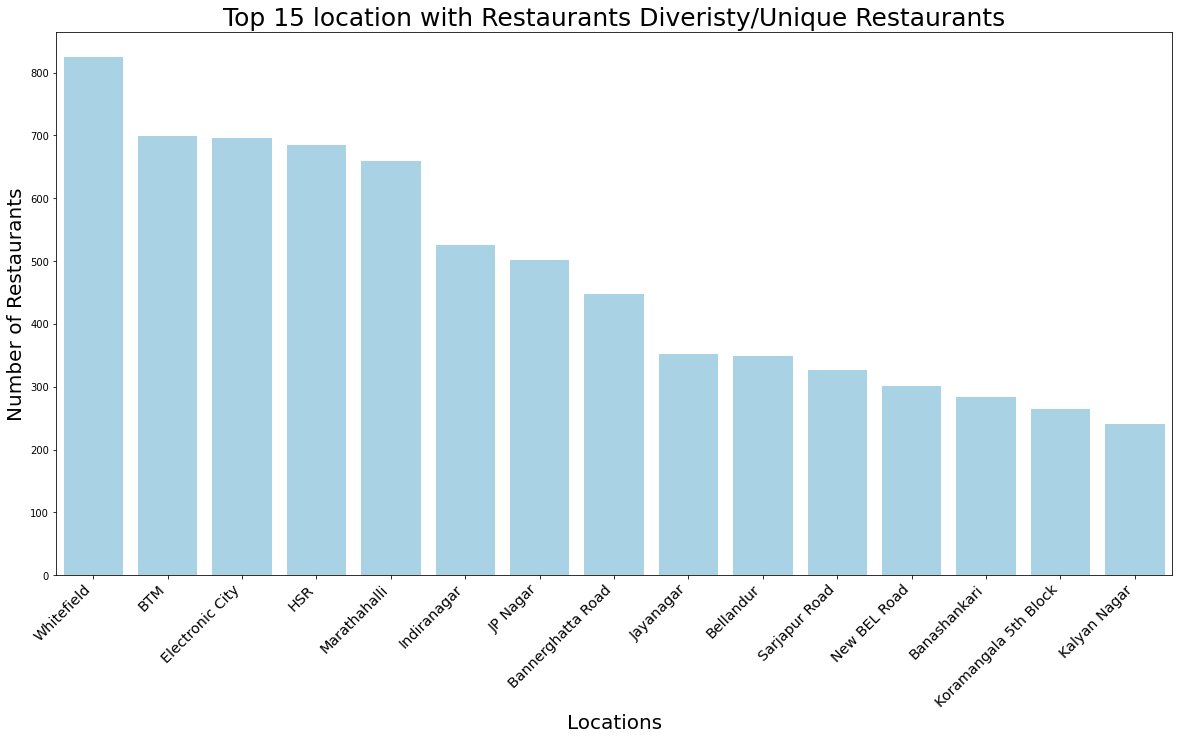

In [16]:
# Filtering locations with most number of unique restaurants

plot_location_graph(df.groupby('location')['name'].nunique().sort_values(ascending=False)[:15,], 'Top 15 location with Restaurants Diveristy/Unique Restaurants')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


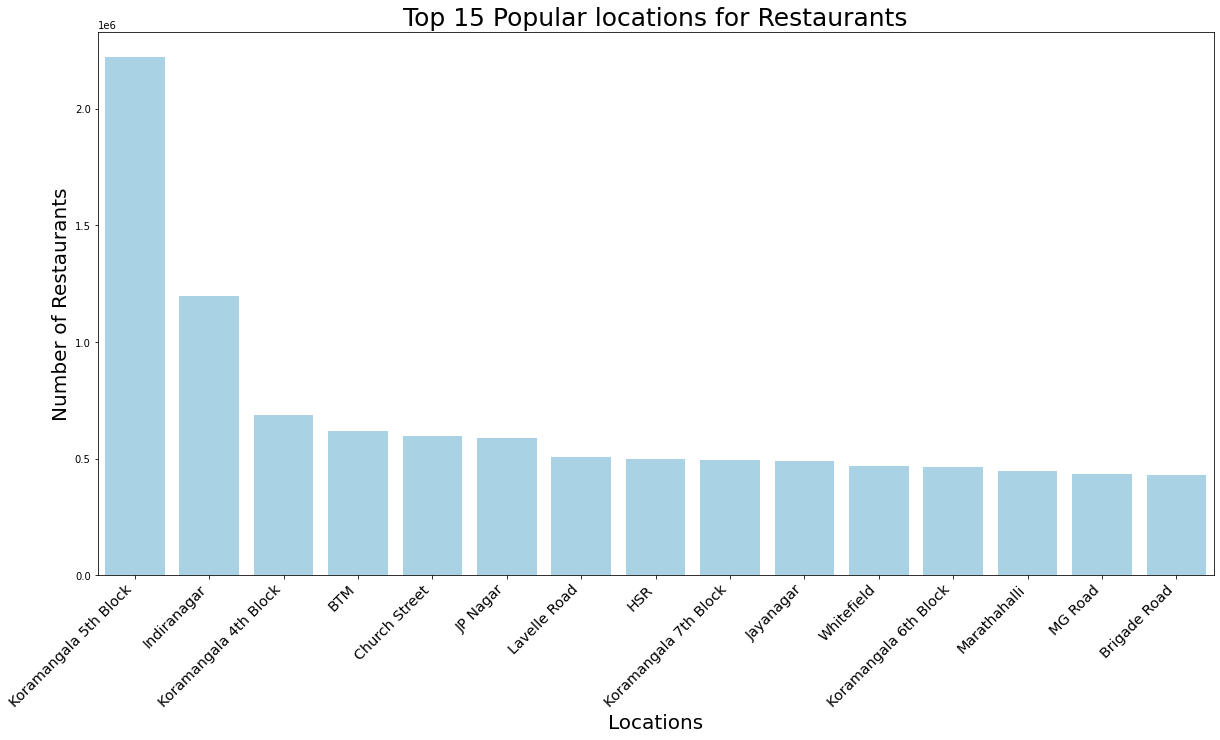

In [17]:
# Filtering locations based on number of votes given by customers

plot_location_graph(df.groupby('location')['votes'].sum().sort_values(ascending=False)[:15,], 'Top 15 Popular locations for Restaurants')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


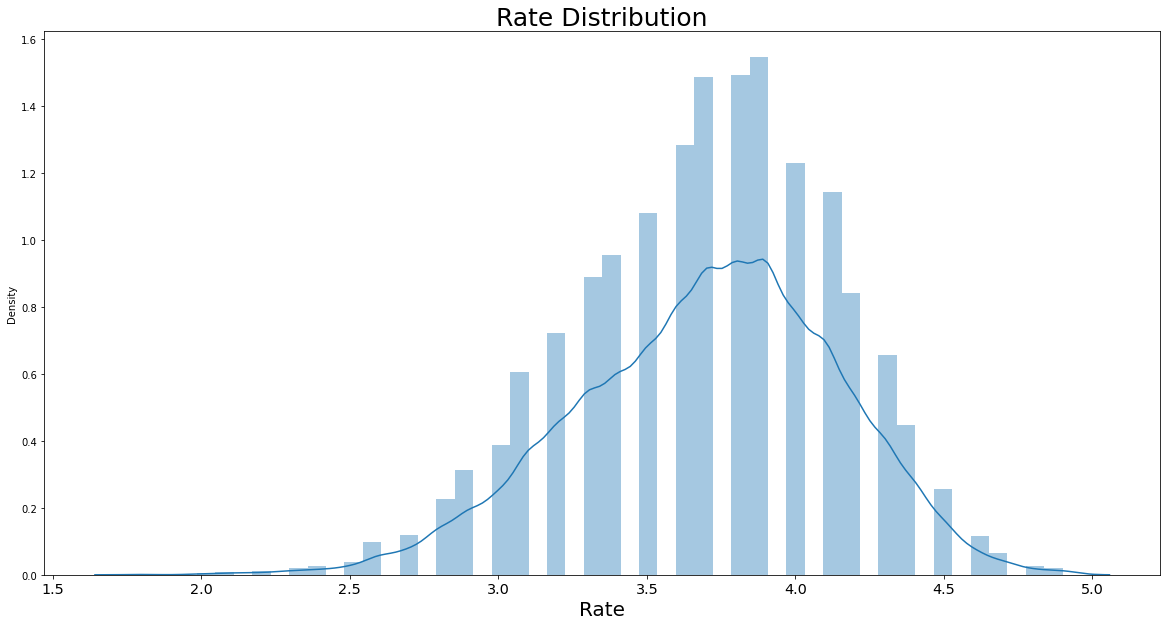

In [18]:
def clean_data(df):
    
    df = df[df['rate'] != 'NEW']
    df = df[df['rate'] != '-']
    df_rate = df.dropna(subset=['location', 'rate', 'rest_type', 'cuisines', 'approx_cost(for two people)'])
    
    # dropping dish_liked column
    df_rate = df_rate.dropna(axis=1)
    
    binary_encode_dict = { 'Yes' : 0, 'No' : 1}
    df_rate.replace({'online_order' : binary_encode_dict, 'book_table' : binary_encode_dict}, inplace=True)
    
    df_rate['rate'] = df_rate['rate'].apply(lambda x: float(x[:-2].strip()))
    
    df_rate = pd.get_dummies(df_rate, columns=['listed_in(type)'], prefix = 'Listed')
    df_rate = pd.get_dummies(df_rate, columns=['listed_in(city)'], prefix = 'City')
    
    df_rate['approx_cost(for two people)'] = df_rate['approx_cost(for two people)'].apply(lambda x: int(x.replace(',','')))
    
    for i,row in df_rate.iterrows():
        rest_types = [x.strip() for x in row['rest_type'].split(',')]
        for rest_type in rest_types:
            df_rate.loc[i,rest_type] = int(1)
    
    df_rate.fillna(0, inplace=True)
    df_rate.drop(['name', 'location', 'rest_type', 'cuisines', 'reviews_list'],axis=1, inplace=True)
    
    return df_rate
    
    
df_rate = clean_data(df)
plt.figure(figsize=(20,10))
sns.distplot(df_rate['rate'])
plt.title('Rate Distribution', fontsize=25)
plt.xlabel('Rate', fontsize=20)
plt.xticks(

        fontweight='light',
        fontsize='x-large'  
    )
plt.show()

In [19]:
print('First Quantile of rate distribution is {} '.format(np.quantile(df_rate['rate'], 0.25)))
print('Second Quantile of rate distribution is {} '.format(np.quantile(df_rate['rate'], 0.50)))
print('Third Quantile of rate distribution is {} '.format(np.quantile(df_rate['rate'], 0.75)))
print('Forth Quantile of rate distribution is {} '.format(np.quantile(df_rate['rate'], 1)))
print('Average Rating is {} '.format(df_rate['rate'].mean()))

First Quantile of rate distribution is 3.4 
Second Quantile of rate distribution is 3.7 
Third Quantile of rate distribution is 4.0 
Forth Quantile of rate distribution is 4.9 
Average Rating is 3.702011487288854 


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


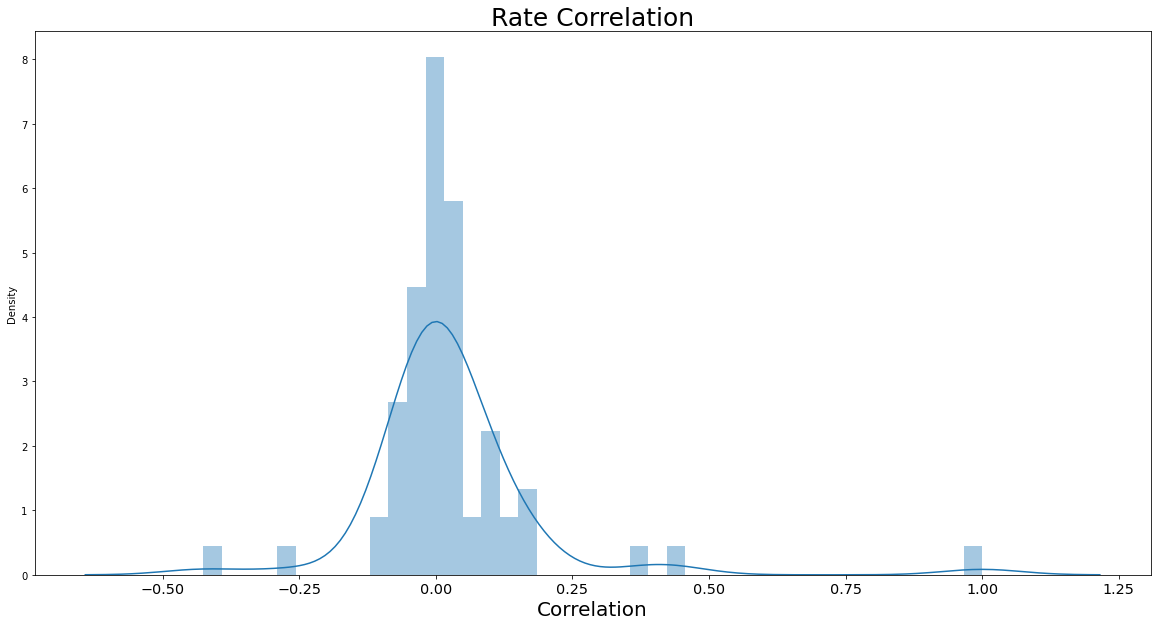

In [20]:
corr = df_rate.corr()
corr_clean = corr[['rate']]
plt.figure(figsize=(20,10))
sns.distplot(corr_clean)
plt.title('Rate Correlation', fontsize=25)
plt.xlabel('Correlation', fontsize=20)
plt.xticks(

        fontweight='light',
        fontsize='x-large'  
    )
plt.show()

In [22]:
corr_clean[corr_clean['rate']>0.3]
#Here we can see that there is not much correlation between rate of restuarants and others features. 
#Taking features with correlation value greater than 0.3 i.e votes, approx_cost(for two people), for further analysis.

,rate
rate,1.000000
votes,0.435256
approx_cost(for two people),0.385384


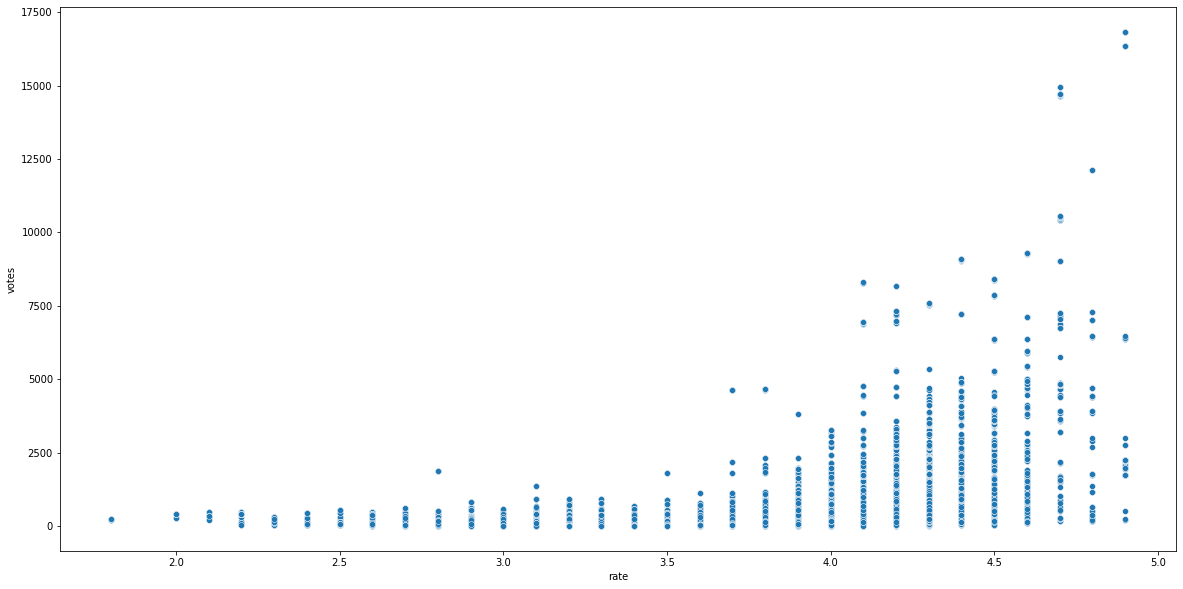

In [23]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='rate',y='votes',data=df_rate)
plt.show()

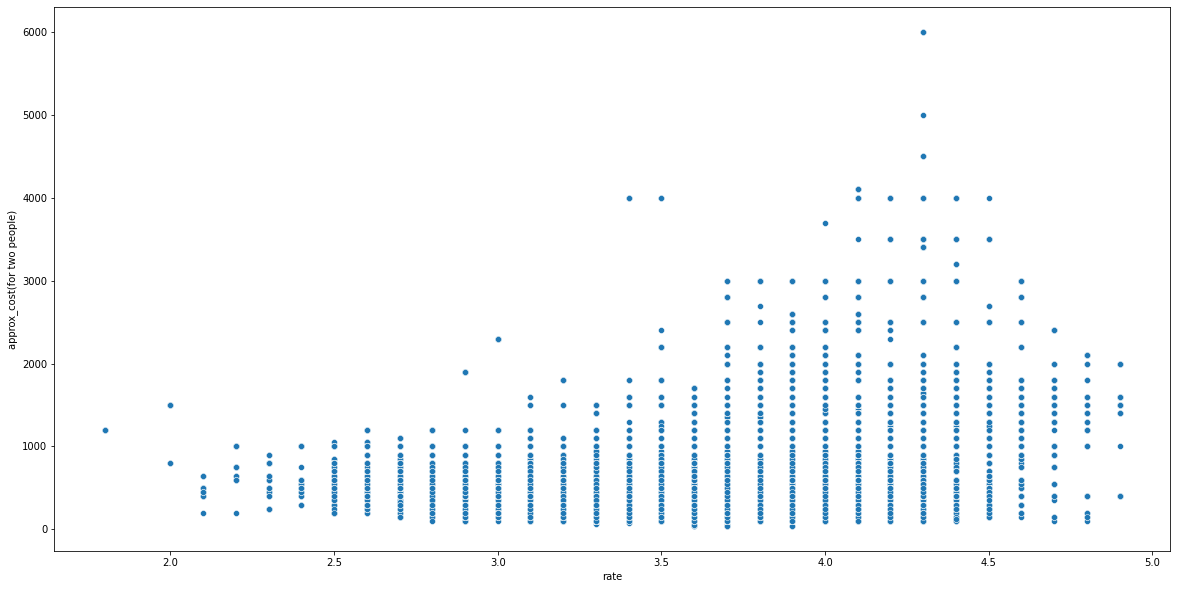

In [24]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='rate',y='approx_cost(for two people)',data=df_rate)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


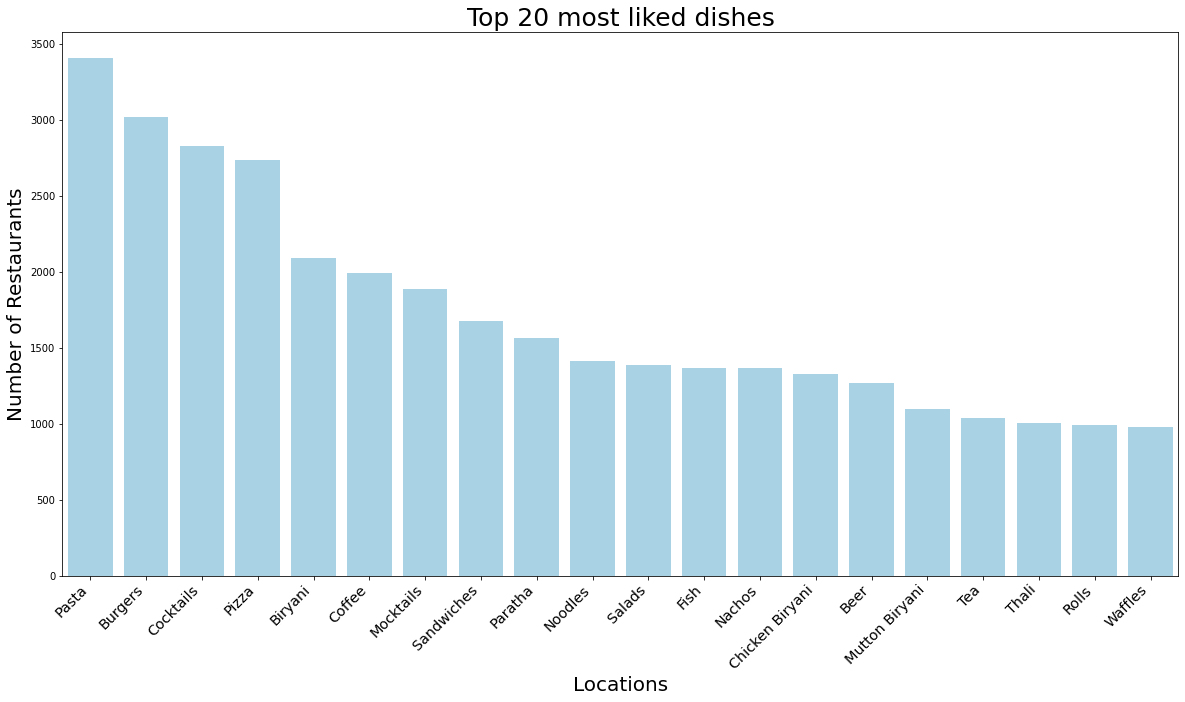

In [25]:
def dish_liked_counter(df):
    
    dish_liked_dict = {}
    dishes = df['dish_liked'].dropna()

    for dish in dishes:
        dish_list = [x.strip() for x in dish.split(',')]
        for dish_item in dish_list:
            if dish_item in dish_liked_dict.keys():
                dish_liked_dict[dish_item] +=1
            else:
                dish_liked_dict[dish_item] = 1
    return dish_liked_dict
def plot_top_dishes(dish_liked_dict):
    sorted_dish = sorted(dish_liked_dict.items(), key=operator.itemgetter(1), reverse=True)
    x = [x[0] for x in sorted_dish[:20]]
    y = [y[1] for y in sorted_dish[:20]]
    
    plt.figure(figsize=(20,10))
    sns.barplot(x, y, alpha=0.8, color = 'skyblue')
    plt.title('Top 20 most liked dishes', fontsize=25)
    plt.ylabel('Number of Restaurants', fontsize=20)
    plt.xlabel('Locations', fontsize=20)
    plt.xticks(
        rotation=45, 
        horizontalalignment='right',
        fontweight='light',
        fontsize='x-large'  
    )
    plt.show()
dish_liked_dict = dish_liked_counter(df)
plot_top_dishes(dish_liked_dict)

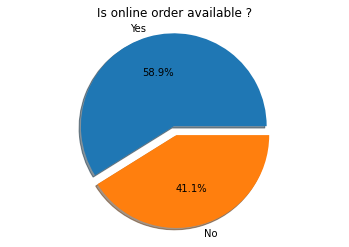

In [26]:
def online_order_pie(df):
    '''
    Function to plot online order pie chart
    
    Input :
     - df : 
    
    '''

    online_order = df['online_order'].value_counts()
    plt.pie(online_order.values, labels=online_order.index, autopct='%1.1f%%', explode=(0, 0.1) ,shadow=True)
    plt.title('Is online order available ?')
    plt.axis('equal')
    plt.show()
    
online_order_pie(df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


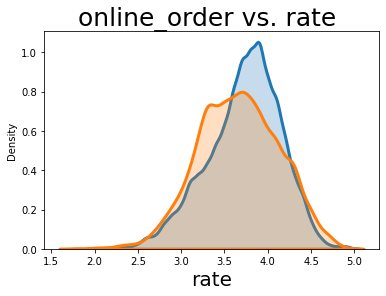

In [27]:
def plot_distribution_overlay(df, attribute):
    '''
    Funtion to plot distribution graph of one plot on top of another
    
    Input:
     - df : Dataframe containing restuarants details
     - attribute : attribute with which online ordering needs to be tested
     
     Output:
     - Provide overlay distribution plot
    
    '''
    
    sns.distplot(df_rate[df_rate['online_order']==0][attribute].values, hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, label = 'Online')
    sns.distplot(df_rate[df_rate['online_order']==1][attribute].values, hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, label = 'Offline')
    
    plt.title('online_order vs. {} '.format(attribute), fontsize=25)
    plt.xlabel(attribute, fontsize=20)
    plt.show()
    
    
    
plot_distribution_overlay(df_rate, 'rate')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


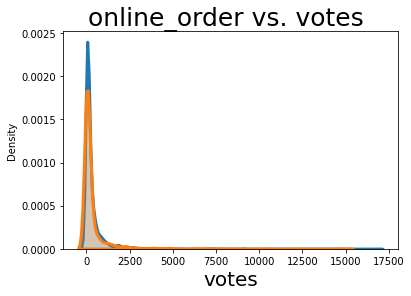

In [28]:
plot_distribution_overlay(df_rate, 'votes')